# Instantiate SNAP Circuit with KGForge

## Imports

In [1]:
import os
import getpass
from pprint import pprint

import neurom as nm
from kgforge.core import KnowledgeGraphForge
from bluepysnap.kgforge import KGCircuitSonata, KGCircuitBluepy, query_resources
import matplotlib.pyplot as plt
%matplotlib inline

## KGForge
Create a KGForge instance to access data in Nexus project `{ORGANIZATION}/{PROJECT}`.

In [2]:
# Clone the KGForge repo
if not os.path.exists('nexus-forge'):
    os.system('git clone https://github.com/BlueBrain/nexus-forge.git')

In [3]:
# Path to nexus config file (in KGForge project)
nexus_config = os.path.join(os.path.abspath(os.getcwd()), 'nexus-forge/examples/configurations/forge.yml')

In [4]:
# organization / project as in Nexus
ORGANIZATION = 'nse'                                          
PROJECT = 'test'
ENDPOINT = 'https://bbp.epfl.ch/nexus/v1'

Copy the token from [Nexus](https://bbp.epfl.ch/nexus) and paste it here

In [5]:
# Paste the token here
TOKEN = getpass.getpass()

 ·······································································································································································································································································································································································································································································································································································································································································································································································································································································································································································································································

In [6]:
# Create the KGForge instance
forge = KnowledgeGraphForge(nexus_config, bucket=f'{ORGANIZATION}/{PROJECT}', endpoint=ENDPOINT, searchendpoints=None, token=TOKEN)

## SNAP
Instantiate SNAP Circuit with KGForge wrappings (KGCircuit) with Nexus URL.

In [7]:
circuit_url = 'https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/20191025'

In [8]:
circuit = KGCircuitSonata.from_id(circuit_url, forge)

### Metadata
Access the metadata of the circuit.

In [9]:
print(circuit.metadata)
pprint(circuit.store_metadata)

{
    context: https://bbp.neuroshapes.org
    id: https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/20191025
    type: DetailedCircuit
    brainLocation:
    {
        brainRegion:
        {
            id: http://api.brain-map.org/api/v2/data/Structure/549
            label: Thalamus
        }
    }
    circuitBase:
    {
        type: DataDownload
        url: file:///gpfs/bbp.cscs.ch/project/proj82/circuits/Thalamus/20191025
    }
    circuitType: Atlas-based circuit
    description: First version of whole Thalamus model
    name: Whole Thalamus 2019.v1
    subject:
    {
        id: https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/a813ddf2-8031-4342-8da4-e27ccd0218fb
        type: Subject
    }
    wasGeneratedBy:
    {
        id: https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/eb41557b-22a6-4ee8-b76a-efb8fd7352b7
        type: WorkflowExecution
    }
}
{'_constrainedBy': 'https://bluebrain.github.io/nexus/schemas/unconstrained.json',
 '_createdAt': '2019-12-19T10:09:20.630236

#### Extra metadata
Direct access to certain nexus metadata info, such as the creator or the creation time of the circuit.

In [10]:
print(circuit.creator, circuit.created_at)

https://bbp.epfl.ch/nexus/v1/realms/bbp/users/ivaska 2019-12-19T10:09:20.630236Z


### Simulations and Simulation Campaigns
Get a simulation in which the circuit was used and print its metadata.

In [11]:
print(circuit.simulations[0].metadata)

{
    context: https://bbp.neuroshapes.org
    id: https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/SimulationNexusTask_entity_managemen__gpfs_bbp_cscs_c__03c48af236
    type: Simulation
    brainLocation:
    {
        brainRegion:
        {
            id: http://api.brain-map.org/api/v2/data/Structure/549
            label: Thalamus
        }
    }
    ca: 2.0
    description: duration=3000 target=Mosaic Ca=2.0
    duration: 3000
    endedAtTime: 2019-12-19T12:52:54.050054
    mg: 1.0
    name: Campaign simulation
    path: /gpfs/bbp.cscs.ch/project/proj82/simulations/Thalamus/20191210/spontaneous_rest/TC2TC_W0p0/seed449150
    seed: 449150
    startedAtTime: 2019-12-19T12:52:47.064924
    status: Done
    subject:
    {
        id: https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/a813ddf2-8031-4342-8da4-e27ccd0218fb
        type: Subject
    }
    target: Mosaic
    wasStartedBy:
    {
        id: https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/SimulationCampaignNexusTask_entit

Get a simulation campaign in which the circuit was used and print its metadata.

In [12]:
print(circuit.simulation_campaigns[0].metadata)

{
    context: https://bbp.neuroshapes.org
    id: https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/SimulationCampaignNexusTask_entity_managemen_https___bbp_epfl__gpfs_bbp_cscs_c_7a85c8cbcd
    type: SimulationCampaign
    brainLocation:
    {
        brainRegion:
        {
            id: http://api.brain-map.org/api/v2/data/Structure/549
            label: Thalamus
        }
    }
    description: Simulation campaign for config: Spontaneous activity in the whole Thalamus circuit
    endedAtTime: 2019-12-19T12:52:59.843041
    name: Spontaneous activity in the whole Thalamus circuit
    startedAtTime: 2019-12-19T12:52:49.609532
    status: Done
    subject:
    {
        id: https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/a813ddf2-8031-4342-8da4-e27ccd0218fb
        type: Subject
    }
    used:
    [
        {
            id: https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/spontaneous_rest
            type: SimWriterConfiguration
        }
        {
            id: https://bbp.e

Easily access to some metadata, such as Nexus project.

In [13]:
circuit.simulations[0].project

'https://bbp.epfl.ch/nexus/v1/projects/nse/test'

### SNAP functionalities
Some examples of SNAP usage. 

#### Get a node and print its data

In [14]:
node = circuit.nodes['All'].get(10)
print(node)

etype                                                                     bAC_IN
layer                                                                        VPL
model_template                                                        hoc:bAC_IN
morph_class                                                                  INT
morphology                     dend-jy180406_B_idC_axon-jy171019_B_10x_resta_...
mtype                                                                     VPL_IN
region                                                                        AD
rotation_angle_xaxis                                                    -1.63225
rotation_angle_yaxis                                                     1.12693
rotation_angle_zaxis                                                     2.59732
synapse_class                                                                INH
x                                                                        6236.79
y                           

#### Group nodes and count them 

In [15]:
node_population = circuit.nodes['All']
df_all = node_population.get(properties=['layer', 'synapse_class', 'x', 'y', 'z'])
df_all.groupby(['synapse_class', 'layer']).count().fillna(0)

x          y          z
synapse_class layer                                 
EXC           Rt           0.0        0.0        0.0
              VPL    1636222.0  1636222.0  1636222.0
INH           Rt       99488.0    99488.0    99488.0
              VPL      96154.0    96154.0    96154.0

#### Plot nodes

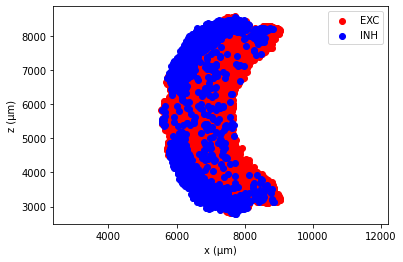

In [16]:
df_grouped = df_all.groupby('synapse_class')

for color, (name, group) in zip(('r', 'b'), df_grouped):
    plt.scatter(group.x[::100], group.z[::100], c=color, label=name)


plt.axis('equal')
plt.xlabel(u'x (μm)')
plt.ylabel(u'z (μm)')
plt.legend();

#### Bluepy simulation object: plotting firing rate histogram

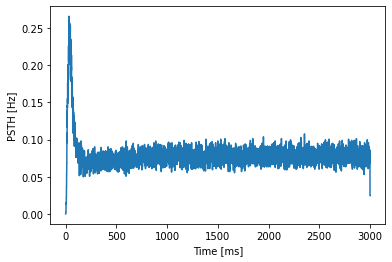

In [17]:
circuit.simulations[0].plot.firing_rate_histogram(sample=None);

# Queries 

Using filters defined in a dictionary to query results ('OR' not yet implemented)

#### Simulation Campaigns

In [18]:
filters = {
    'type': 'SimulationCampaign'
}
res = query_resources(forge, filters)
print('Found {} instances of {}'.format(len(res), filters['type']))

Found 14 instances of SimulationCampaign


#### Simulations

In [19]:
filters = {
    'type': 'Simulation'
}
res = query_resources(forge, filters)
print('Found {} instances of {}'.format(len(res), filters['type']))

Found 88 instances of Simulation


#### Circuits 
Whose creator is ivaska, species is Mouse and that are not deprecated

In [20]:
filters = {
    'species': 'Mouse', 
    'type': 'DetailedCircuit', 
    'creator': 'ivaska', 
    'deprecated': False, 
}
res = query_resources(forge, filters)
print('Found {} non-deprecated instances of {} (creator: {}, species: {})'.format(
    len(res),
    filters['type'], 
    filters['creator'], 
    filters['species']))

Found 3 non-deprecated instances of DetailedCircuit (creator: ivaska, species: Mouse)


#### Limiting search results
Otherwise the same query as the previous

In [21]:
filters['limit'] = 1
res = query_resources(forge, filters)
print('Query resulted in {} result (limit was: {})'.format(len(res), filters['limit']))

Query resulted in 1 result (limit was: 1)


#### Creating instances of the query

In [22]:
circuits = KGCircuitBluepy.from_query(res, forge)
print('{} instance(s) of {}'.format(len(circuits), type(circuits[0])))

1 instance(s) of <class 'bluepysnap.kgforge.KGCircuitBluepy'>


# NeuroM

### Bluepy Circuit

In [23]:
# Instantiate a neuron
circuit_bluepy = circuits[0]
path = circuit_bluepy.morph.get_filepath(1)
neuron = nm.load_neuron(path)

### Sonata Circuit

In [24]:
# Create a KGForge instance to another project (nse/test2)
forge2 = KnowledgeGraphForge(nexus_config, bucket='nse/test2', endpoint=ENDPOINT, searchendpoints=None, token=TOKEN)

In [25]:
# Load Circuit
circuit_sonata = KGCircuitSonata.from_query(query_resources(forge2, {'type': 'DetailedCircuit'}), forge2)[0]

In [26]:
# Instantiate a neuron
node_population = circuit_sonata.nodes['Mosaic']
path = node_population.morph.get_filepath(0)
neuron = nm.load_neuron(path)

## MorphologyRelease
Access via path traversal

In [27]:
morphology_release = circuit_bluepy.nodeCollection.memodelRelease.morphologyRelease

Or via shortcut (a SPARQL query)

In [28]:
assert circuit_bluepy.morphology_release.id == morphology_release.id

#### Available metadata

In [29]:
print(morphology_release.metadata)
pprint(morphology_release.store_metadata)

{
    context: https://bbp.neuroshapes.org
    id: https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/O1-20190624-syn_morph_release
    type: MorphologyRelease
    distribution:
    {
        type: DataDownload
    }
    morphologyIndex:
    {
        id: https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/O1-20190624-syn_morph_index
        type: ModelReleaseIndex
    }
    name: O1-20190624-syn_morph_release
    wasAttributedTo:
    {
        id: https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/bae247a3-d4cf-4995-97d8-67235cb33fb0
        type: WorkflowExecution
    }
}
{'_constrainedBy': 'https://bluebrain.github.io/nexus/schemas/unconstrained.json',
 '_createdAt': '2019-10-04T13:43:12.817510Z',
 '_createdBy': 'https://bbp.epfl.ch/nexus/v1/realms/bbp/users/ivaska',
 '_deprecated': False,
 '_incoming': 'https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/O1-20190624-syn_morph_release/incoming',
 '_outgoing': 'https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/O1-20190624-syn_morph_release

In [30]:
forge.retrieve('https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/O1-20190624-syn_morph_index', cross_bucket=True)

Resource(_last_action=None, _validated=False, _synchronized=True, _store_metadata={'id': 'https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/O1-20190624-syn_morph_index', '_self': 'https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/O1-20190624-syn_morph_index', '_constrainedBy': 'https://bluebrain.github.io/nexus/schemas/unconstrained.json', '_project': 'https://bbp.epfl.ch/nexus/v1/projects/nse/test', '_rev': 1, '_deprecated': False, '_createdAt': '2019-10-04T13:43:12.322704Z', '_createdBy': 'https://bbp.epfl.ch/nexus/v1/realms/bbp/users/ivaska', '_updatedAt': '2019-10-04T13:43:12.322704Z', '_updatedBy': 'https://bbp.epfl.ch/nexus/v1/realms/bbp/users/ivaska', '_incoming': 'https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/O1-20190624-syn_morph_index/incoming', '_outgoing': 'https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/O1-20190624-syn_morph_index/outgoing'}, context='https://bbp.neuroshapes.org', id='https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/O1-20190624-syn_morph_index', typ

## Cross Bucket/Project
For cross project access, `{ORGANIZATION}/{PROJECT}` needs to be `bbp_test/read`. Also, using staging environment here.

In [31]:
# Creating a KnowledgeGraphForge instance for staging
ORGANIZATION = 'bbp_test'                                          
PROJECT = 'read'
endpoint_staging = 'https://staging.nexus.ocp.bbp.epfl.ch/v1'
forge_cp = KnowledgeGraphForge(nexus_config, bucket=f'{ORGANIZATION}/{PROJECT}', endpoint=endpoint_staging, token=TOKEN)

### Retrieval

In [32]:
circuit_studio_b = 'https://bbp.epfl.ch/neurosciencegraph/data/a4380755-3a79-4687-95b9-d0aa9b9d67b8'
circuit_studio_c = 'https://bbp.epfl.ch/neurosciencegraph/data/621a7d17-d2b2-4eef-8cfd-c4769cc08778'
simulation_studio_c = 'https://bbp.epfl.ch/neurosciencegraph/data/d163dc0a-d3d2-440e-a5be-2f83b80072a5'

# Testing that circuits and the simulation in studio B and C can be retrieved from bbp_test/read
circuit_b = forge_cp.retrieve(circuit_studio_b, cross_bucket=True)
circuit_c = forge_cp.retrieve(circuit_studio_c, cross_bucket=True)
simulation_c = forge_cp.retrieve(simulation_studio_c, cross_bucket=True)

# Now, let's test that we can create snap circuits with them
circuit_b = KGCircuitBluepy(circuit_b, forge_cp)
circuit_c = KGCircuitBluepy(circuit_c, forge_cp)
print(f'Circuit B:\n{circuit_b.metadata}\n')
print(f'Circuit C:\n{circuit_c.metadata}\n')

Circuit B:
{
    context: https://bbp.neuroshapes.org
    id: https://bbp.epfl.ch/neurosciencegraph/data/a4380755-3a79-4687-95b9-d0aa9b9d67b8
    type: DetailedCircuit
    brainLocation:
    {
        brainRegion:
        {
            id: http://purl.obolibrary.org/obo/UBERON_0008933
            label: primary somatosensory cortex
        }
    }
    circuitBase:
    {
        type: DataDownload
        url: file:///gpfs/bbp.cscs.ch/project/proj1/circuits/SomatosensoryCxS1-v5.r0/O1/merged_circuit
    }
    circuitType: Circuit with O1 geometry
    description: O1.v5 created in 2014
    name: O1.v5 (Rat) B
    subject:
    {
        id: https://bbp.epfl.ch/neurosciencegraph/data/0cacd56a-2850-440f-b6eb-77c0df6485ae
        type: Subject
    }
}

Circuit C:
{
    context: https://bbp.neuroshapes.org
    id: https://bbp.epfl.ch/neurosciencegraph/data/621a7d17-d2b2-4eef-8cfd-c4769cc08778
    type: DetailedCircuit
    brainLocation:
    {
        brainRegion:
        {
            id: http

In [33]:
# Test if we can access simulation (in studio_data_C) with the SNAP Circuit (in studio_data_B)
print('Simulations found: {}'.format(len(circuit_b.simulations)))

No config path available for simulation


Simulations found: 1


### Searching
Searching with `KnowledgeGraphForge.search` (`sparql` is automatically covered)

In [34]:
# instantiate the path for filtering
p = forge_cp.paths("Dataset")

In [35]:
# Search DetailedCircuits cross project, including all projects
for res in forge_cp.search(p.type.id=='DetailedCircuit', cross_bucket=True):
    print(res.type, res._store_metadata._project)

DetailedCircuit https://staging.nexus.ocp.bbp.epfl.ch/v1/projects/bbp_test/studio_data_C
DetailedCircuit https://staging.nexus.ocp.bbp.epfl.ch/v1/projects/bbp_test/studio_data_B
DetailedCircuit https://staging.nexus.ocp.bbp.epfl.ch/v1/projects/bbp_test/studio_data_B


In [36]:
# Search DetailedCircuits cross project, narrowing it down to just bbp_test/studio_data_C
for res in forge_cp.search(p.type.id=='DetailedCircuit', cross_bucket=True, bucket='bbp_test/studio_data_C'):
    print(res.type, res._store_metadata._project)

DetailedCircuit https://staging.nexus.ocp.bbp.epfl.ch/v1/projects/bbp_test/studio_data_C
